In [124]:
# Import package dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import preprocessing

# Load data

In [125]:
dt = pd.read_csv('./data/train.csv')
du= pd.read_csv('./data/unique_m.csv')

# Exploration

In [126]:
print(dt.shape)
dt.head()

(21263, 82)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [127]:
p = dt.describe()
p

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


# Check for missing data

In [128]:
for i in dt.columns:
    if p.loc["count", i] != dt.shape[0]:
        print (i)

# Delete the response

In [129]:
del du['critical_temp']
print(du.shape)
du.head()

(21263, 87)


,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


# Using the material columns because it is strem, and is variable for each row, so the decision was no to use it

In [130]:
f= du.iloc[:, 0:85]

# Check for missing data in the second datafile

In [131]:
d = f.describe()
d

,H,He,Li,Be,B,C,N,O,F,Ne,...,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,0.022512,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,0.282265,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,10.000000,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0


In [132]:
for i in d.columns:
    if d.loc["count", i] != du.shape[0]:
        print (i)

# Merged the 2 data file by the row index

In [133]:
# Merge two Dataframes on index of both the dataframes
mergedDf = dt.merge(du, left_index=True, right_index=True)

# Check the merged data

In [134]:
print(mergedDf.shape)
mergedDf.head()

(21263, 169)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


In [135]:
mergedDf.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0


In [136]:
mergedDf.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
Bi                       float64
Po                         int64
At                         int64
Rn                         int64
material                  object
Length: 169, dtype: object

# Explorate each column with pandas profiling

In [70]:
profile = ProfileReport(mergedDf, minimal=True)
profile.to_file(output_file="output.html")

# Response

In [137]:
response= mergedDf["critical_temp"]
del mergedDf['critical_temp']
response.shape

(21263,)

# Normalization of the data

In [138]:
sc= mergedDf.iloc[:, 0:167]
x = sc.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalize_df = pd.DataFrame(x_scaled)
normalize_df["material"]= mergedDf["material"]
normalize_df

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,material
0,0.375,0.405879,0.253950,0.299720,0.164988,0.595724,0.542536,0.590973,0.154652,0.514443,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Ba0.2La1.8Cu1O4
1,0.500,0.424611,0.257187,0.332968,0.166341,0.730573,0.540166,0.590973,0.175894,0.466193,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.375,0.405879,0.254061,0.299720,0.165017,0.595724,0.498406,0.590973,0.173847,0.514443,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Ba0.1La1.9Cu1O4
3,0.375,0.405879,0.254005,0.299720,0.165002,0.595724,0.522056,0.590973,0.164249,0.514443,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Ba0.15La1.85Cu1O4
4,0.375,0.405879,0.253838,0.299720,0.164960,0.595724,0.576663,0.590973,0.135458,0.514443,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.375,0.495037,0.230416,0.379038,0.198893,0.593380,0.640444,0.706254,0.075415,0.651003,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Tm0.84Lu0.16Fe3Si5
21259,0.500,0.422322,0.210301,0.292115,0.149295,0.667047,0.802588,0.905812,0.035767,0.685338,...,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,Tl1Ba2Ca3Cu4O11
21260,0.125,0.458931,0.440299,0.462110,0.451665,0.348245,0.270757,0.064978,0.257995,0.066886,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Nb0.8Pd0.2
21261,0.125,0.458931,0.447638,0.462110,0.458605,0.348245,0.327281,0.064978,0.151346,0.066886,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Nb0.69Pd0.31


In [168]:
normalize_df.columns= mergedDf.columns
del normalize_df['material']
normalize_df["Critical_Temperature"]= response
normalize_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,Critical_Temperature
0,0.375,0.405879,0.253950,0.299720,0.164988,0.595724,0.542536,0.590973,0.154652,0.514443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1,0.500,0.424611,0.257187,0.332968,0.166341,0.730573,0.540166,0.590973,0.175894,0.466193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
2,0.375,0.405879,0.254061,0.299720,0.165017,0.595724,0.498406,0.590973,0.173847,0.514443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
3,0.375,0.405879,0.254005,0.299720,0.165002,0.595724,0.522056,0.590973,0.164249,0.514443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,0.375,0.405879,0.253838,0.299720,0.164960,0.595724,0.576663,0.590973,0.135458,0.514443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0


# Split the data in train and test

In [169]:
# Create training and testing sets (cross-validation not needed)
train_set = normalize_df.sample(frac=0.7, random_state=100)
test_set = normalize_df[~normalize_df.isin(train_set)].dropna()
print(train_set.shape[0])
print(test_set.shape[0])

14884
6379


In [170]:
# Get the training and testing row indices for later use
train_index = train_set.index.values.astype(int)
test_index = test_set.index.values.astype(int)

In [171]:
# Converting the training and testing datasets back to matrix-formats
X_train = train_set.iloc[:, 0:167].values # returns the data; excluding the target
Y_train = train_set.iloc[:, -1].values # returns the target-only
X_test = test_set.iloc[:, 0:167].values # ""
Y_test = test_set.iloc[:, -1].values # ""

# Lasso regularization

In [172]:
from sklearn import linear_model
l1_mod = linear_model.Lasso(alpha=0.001, normalize=True).fit(X_train, Y_train)
print(l1_mod.score(X_train, Y_train))
print(l1_mod.coef_)
print(l1_mod.intercept_)
print(l1_mod.get_params())

0.7464970539748981
[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.62416684e+00  1.94695256e+01  3.11338613e+01
 -1.61473617e+01  0.00000000e+00 -2.73342900e+01  0.00000000e+00
  0.00000000e+00  1.91874474e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -3.99058536e-01
 -0.00000000e+00 -0.00000000e+00  9.42002100e-01 -3.05585040e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  5.29958802e+00
 -3.51809604e+00 -0.00000000e+00  6.38066465e+00 -6.80969283e+00
  0.00000000e+00 -9.15800334e+00  0.00000000e+00 -1.45842388e+01
 -0.00000000e+00 -2.70509878e+00  1.93034791e+01 -0.00000000e+00
 -5.41180662e+00  4.59917550e+00  0.00000000e+00  0.00000000e+00
 -2.84228717e+01 -0.00000000e+00 -2.55329990e+01 -0.00000000e+00
 -1.13335206e+01  1.06893079e+01 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.71433439e-01 -0.00000000e+00
  1.33681908e+01 -0.00000000e+00  6.84298807e+00 -0.00000000e+00
 -1.37

# Interpret the weights

In [195]:
# iterate over the coefficients
weights = l1_mod.coef_.T # take transpose to make a column vector
variable_names = normalize_df.columns
for coef, name in zip(weights,variable_names):
    if coef > 0 or coef <0:
        print(name, 'has weight of', coef)
    


entropy_atomic_mass has weight of -1.6241668423843665
wtd_entropy_atomic_mass has weight of 19.469525550605667
range_atomic_mass has weight of 31.133861250069053
wtd_range_atomic_mass has weight of -16.14736170813877
wtd_std_atomic_mass has weight of -27.33428995724327
gmean_fie has weight of 19.18744742368801
std_fie has weight of -0.3990585359663058
wtd_mean_atomic_radius has weight of 0.9420021003192816
gmean_atomic_radius has weight of -3.055850398296479
range_atomic_radius has weight of 5.299588020371286
wtd_range_atomic_radius has weight of -3.518096044005758
wtd_std_atomic_radius has weight of 6.380664654113923
mean_Density has weight of -6.80969283197869
gmean_Density has weight of -9.158003344580337
entropy_Density has weight of -14.584238797860003
range_Density has weight of -2.705098777839043
wtd_range_Density has weight of 19.30347911560456
wtd_std_Density has weight of -5.411806617099133
mean_ElectronAffinity has weight of 4.599175496093031
wtd_gmean_ElectronAffinity has w

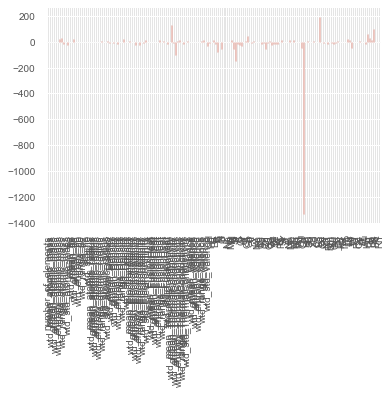

In [196]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(weights,index=normalize_df.columns[0:167])
weights.plot(kind='bar')
plt.show()

# Predict

In [173]:
Y_pred2 = l1_mod.predict(X_test)

orig_mae2 = mean_absolute_error(Y_test,Y_pred2)
orig_mse2 = mean_squared_error(Y_test,Y_pred2)
orig_rmse_val2 = rmse(Y_test,Y_pred2)
orig_r22 = r2_score(Y_test,Y_pred2)
print("MAE: %.3f"%orig_mae2)
print("MSE:  %.3f"%orig_mse2)
print("RMSE:  %.3f"%orig_rmse_val2)
print("R2:  %.3f"%orig_r22)

MAE: 13.235
MSE:  587.414
RMSE:  24.237
R2:  0.492


# Try with x train for comparison

In [174]:
Y_pred2_tr = l1_mod.predict(X_train)

orig_mae2_tr = mean_absolute_error(Y_train,Y_pred2_tr)
orig_mse2_tr = mean_squared_error(Y_train,Y_pred2_tr)
orig_rmse_val2_tr = rmse(Y_train,Y_pred2_tr)
orig_r22_tr = r2_score(Y_train,Y_pred2_tr)
print("MAE: %.3f"%orig_mae2_tr)
print("MSE:  %.3f"%orig_mse2_tr)
print("RMSE:  %.3f"%orig_rmse_val2_tr)
print("R2:  %.3f"%orig_r22_tr)

MAE: 12.865
MSE:  299.378
RMSE:  17.303
R2:  0.746


In [175]:
# Find the variable with the largest "normalized" coefficient value
print('The positive(max) coef-value is {}'.format(max(l1_mod.coef_))) # Positive Max
#print('The abs(max) coef-value is {}'.format(max(l1_mod.coef_, key=abs))) # ABS Max
max_var = max(l1_mod.coef_) # Positive Max
#max_var = max(reg.coef_, key=abs) # ABS Max
var_index = l1_mod.coef_.tolist().index(max_var)
print('The variable associated with this coef-value is {}'.format(normalize_df.columns[var_index]))

The positive(max) coef-value is 194.73946096996644
The variable associated with this coef-value is Ba


In [176]:
res_frame1 = pd.DataFrame({'data':'lasso',
                   'imputation':'none',
                   'mae': orig_mae2, 
                   'mse': orig_mse2, 
                   'rmse':orig_rmse_val2, 
                   'R2':orig_r22}, index=[0])
res_frame1 

,data,imputation,mae,mse,rmse,R2
0,lasso,none,13.235052,587.413596,24.236617,0.491535


# Ridge regularization

In [177]:
from sklearn.linear_model import Ridge

l2_mod = Ridge(alpha=1.0, normalize=True).fit(X_train, Y_train)
print(l2_mod.score(X_train, Y_train))
print(l2_mod.coef_)
print(l2_mod.intercept_)
print(l2_mod.get_params())

0.6799046661458283
[ 4.82355905e+00  8.97046197e-01 -1.34026231e+00 -7.39139633e-01
  8.43952725e-02  9.24550692e-01  6.13658904e+00  4.39921992e+00
 -6.41117541e+00  4.35735049e+00 -2.20188780e+00  5.26721971e+00
 -3.92737419e-01  5.20984263e+00 -7.16886533e-01  2.31326749e+00
  3.86845370e+00  3.19738593e+00 -1.26495651e+00  1.53609559e+00
  4.94227338e-01  4.51534621e+00  6.17238564e+00 -1.28059135e+00
  2.20456114e+00  2.00660057e+00  3.37013201e+00  4.50615575e+00
 -2.97942954e+00  3.67387705e+00  2.55112682e+00 -3.66761362e+00
 -9.95130906e-01 -4.29288431e+00 -1.82577522e+00 -2.50518259e-02
  8.58068940e-01  1.33778840e+00  2.42666445e+00  4.99480485e-01
 -2.92710430e+00 -4.95968280e+00 -3.16585307e+00 -1.02143115e+01
 -1.38514235e+01 -2.41642528e+00 -5.10759100e+00  2.88784844e-01
 -3.10209865e+00  3.31739295e+00  3.76141666e+00 -7.42489537e-02
 -8.47646441e-02 -1.02354837e+00  4.43213733e-01  2.47838597e+00
  3.64541550e+00 -2.57513732e+00  5.01535182e-01 -2.85649688e+00
 -6.95

# Interprete the weight

In [197]:
# iterate over the coefficients
weights = l2_mod.coef_.T # take transpose to make a column vector
variable_names = normalize_df.columns
for coef, name in zip(weights,variable_names):
    if coef > 0 or coef <0:
        print(name, 'has weight of', coef)

number_of_elements has weight of 4.823559047115824
mean_atomic_mass has weight of 0.8970461968865799
wtd_mean_atomic_mass has weight of -1.3402623133017393
gmean_atomic_mass has weight of -0.7391396332077359
wtd_gmean_atomic_mass has weight of 0.0843952724503892
entropy_atomic_mass has weight of 0.924550691708197
wtd_entropy_atomic_mass has weight of 6.136589038912988
range_atomic_mass has weight of 4.399219922955634
wtd_range_atomic_mass has weight of -6.411175405154854
std_atomic_mass has weight of 4.357350488453354
wtd_std_atomic_mass has weight of -2.2018877967444372
mean_fie has weight of 5.267219713819398
wtd_mean_fie has weight of -0.39273741891779457
gmean_fie has weight of 5.209842625637739
wtd_gmean_fie has weight of -0.7168865326828853
entropy_fie has weight of 2.313267486911349
wtd_entropy_fie has weight of 3.8684536999840016
range_fie has weight of 3.1973859293002005
wtd_range_fie has weight of -1.2649565052580536
std_fie has weight of 1.5360955865128625
wtd_std_fie has we

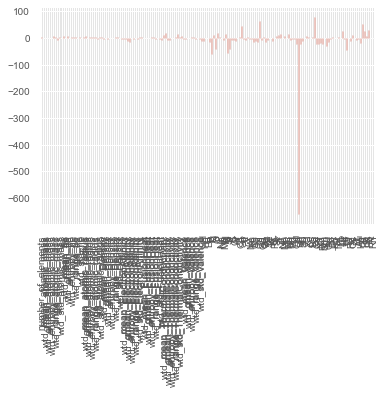

In [198]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(weights,index=normalize_df.columns[0:167])
weights.plot(kind='bar')
plt.show()

# Prediction

In [178]:
Y_pred3 = l2_mod.predict(X_test)

orig_mae3 = mean_absolute_error(Y_test,Y_pred3)
orig_mse3 = mean_squared_error(Y_test,Y_pred3)
orig_rmse_val3 = rmse(Y_test,Y_pred3)
orig_r23 = r2_score(Y_test,Y_pred3)
print("MAE: %.3f"%orig_mae3)
print("MSE:  %.3f"%orig_mse3)
print("RMSE:  %.3f"%orig_rmse_val3)
print("R2:  %.3f"%orig_r23)

MAE: 15.209
MSE:  456.591
RMSE:  21.368
R2:  0.605


# Try the train for comparison

In [179]:
Y_pred3_tr = l2_mod.predict(X_train)

orig_mae3_tr = mean_absolute_error(Y_train,Y_pred3_tr)
orig_mse3_tr = mean_squared_error(Y_train,Y_pred3_tr)
orig_rmse_val3_tr = rmse(Y_train,Y_pred3_tr)
orig_r23_tr = r2_score(Y_train,Y_pred3_tr)
print("MAE: %.3f"%orig_mae3_tr)
print("MSE:  %.3f"%orig_mse3_tr)
print("RMSE:  %.3f"%orig_rmse_val3_tr)
print("R2:  %.3f"%orig_r23_tr)

MAE: 14.922
MSE:  378.021
RMSE:  19.443
R2:  0.680


In [180]:
# Find the variable with the largest "normalized" coefficient value
print('The positive(max) coef-value is {}'.format(max(l2_mod.coef_))) # Positive Max
#print('The abs(max) coef-value is {}'.format(max(l2_mod.coef_, key=abs))) # ABS Max
max_var3 = max(l2_mod.coef_) # Positive Max
#max_var = max(reg.coef_, key=abs) # ABS Max
var_index3 = l2_mod.coef_.tolist().index(max_var3)
print('The variable associated with this coef-value is {}'.format(normalize_df.columns[var_index]))

The positive(max) coef-value is 79.32233466664036
The variable associated with this coef-value is Ba


In [182]:
res_frame2 = pd.DataFrame({'data':'Ridge',
                   'imputation':'none',
                   'mae': orig_mae3, 
                   'mse': orig_mse3, 
                   'rmse':orig_rmse_val3, 
                   'R2':orig_r23}, index=[0])
res_frame = pd.concat([res_frame1, res_frame2])
res_frame

,data,imputation,mae,mse,rmse,R2
0,lasso,none,13.235052,587.413596,24.236617,0.491535
0,Ridge,none,15.208541,456.590625,21.367981,0.604775
